# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [45]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
#Data Import: Import the dataset into a statistical software tool such as Python
try:
    data = pd.read_csv("Wholesale_Data.csv")
    #data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    #print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
except:
    print('Sorry! Dataset could not be loaded.')


In [47]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## As noted in the project description the initial exploration of the data shows 440 Rows of data with 8 columns.  Column 3 and up appear to be numerical apparently denoting the sales of each product in "Monetary Units", with each row representing a clients of the Wholesale Distributor who is the Project Owner.  Columns 0, 1 and 2 are the Index, Channel and Region respectively. Let's explore the datatypes below:

In [48]:
import pandas as pd
data_types = data.dtypes
# Display data types
print(data_types)


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


## Now let's explore for missing values in the dataset

In [49]:
#Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. 
#This may involve removing or imputing missing data or correcting any obvious errors.

# Assuming df is your DataFrame
missing_values = data.isnull().sum()

# Display missing values
print(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


## There don't appear to be missing values within the dataset.  Incorrect values will become more apparent once we do a study of the distrubtion of data.

In [50]:
#Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. 
#This will help in understanding the distribution of data in each column.
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## We have been asked to create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. 


## Detailed below is a historgram

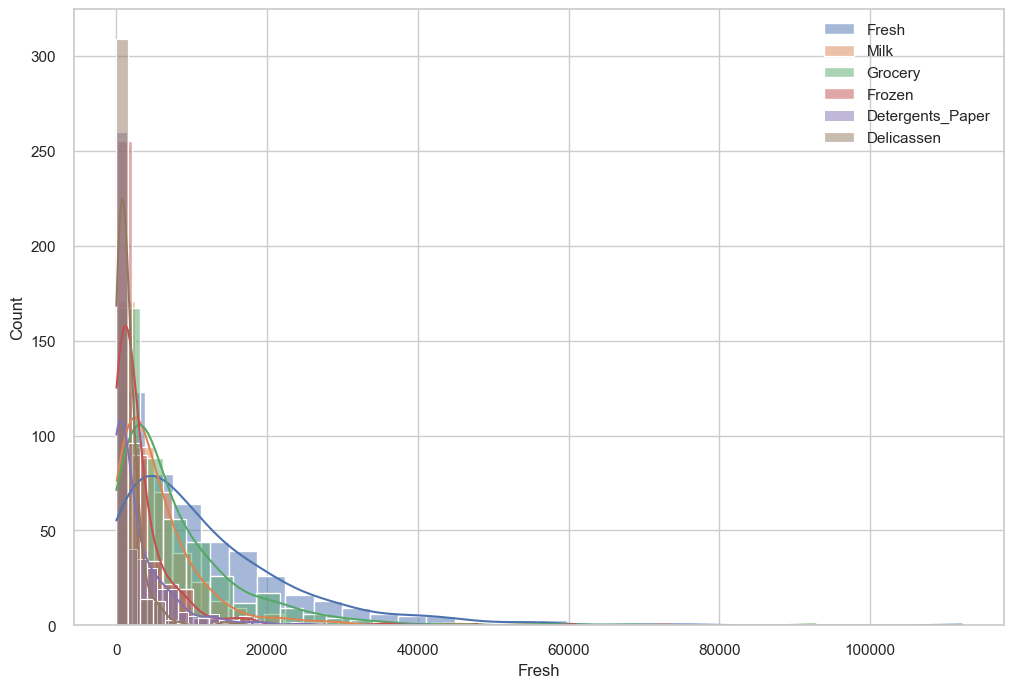

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns excluding 'Channel' and 'Region'
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = data[selected_columns]

# Histograms
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for column in selected_data.columns:
    sns.histplot(selected_data[column], kde=True, bins=30, label=column)

plt.legend()
plt.show()



## The histogram shows a heavily skewed dataset not having a normal distribution

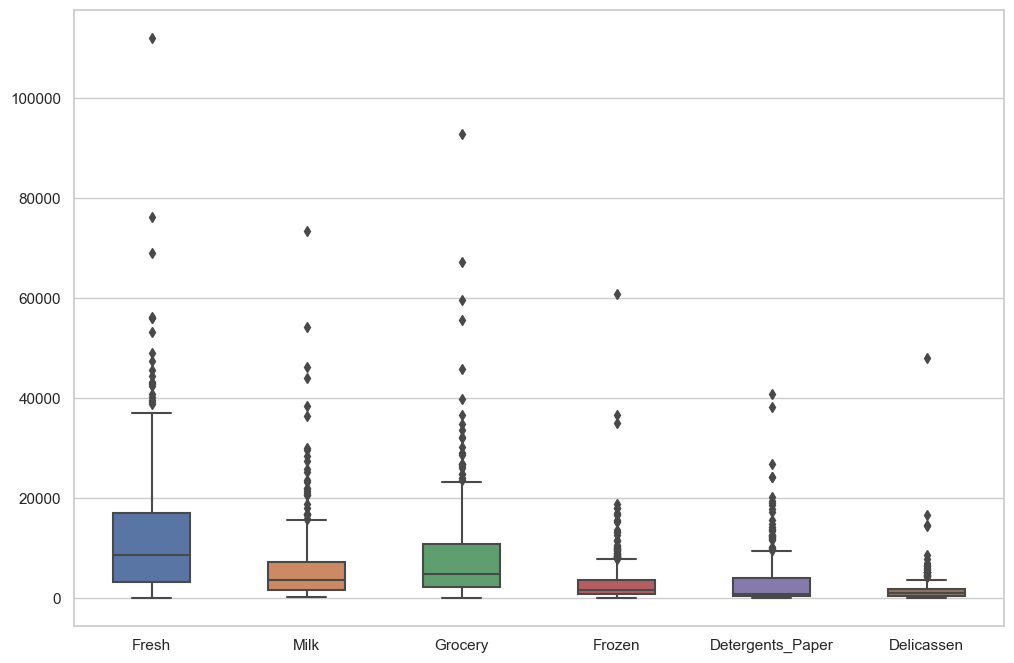

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns excluding 'Channel' and 'Region'
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = data[selected_columns]

# Box Plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.boxplot(data=selected_data, width=0.5)
plt.show()


## The boxplots show a very skewed dataset, with outliers far in excess of 2 standard deviations away

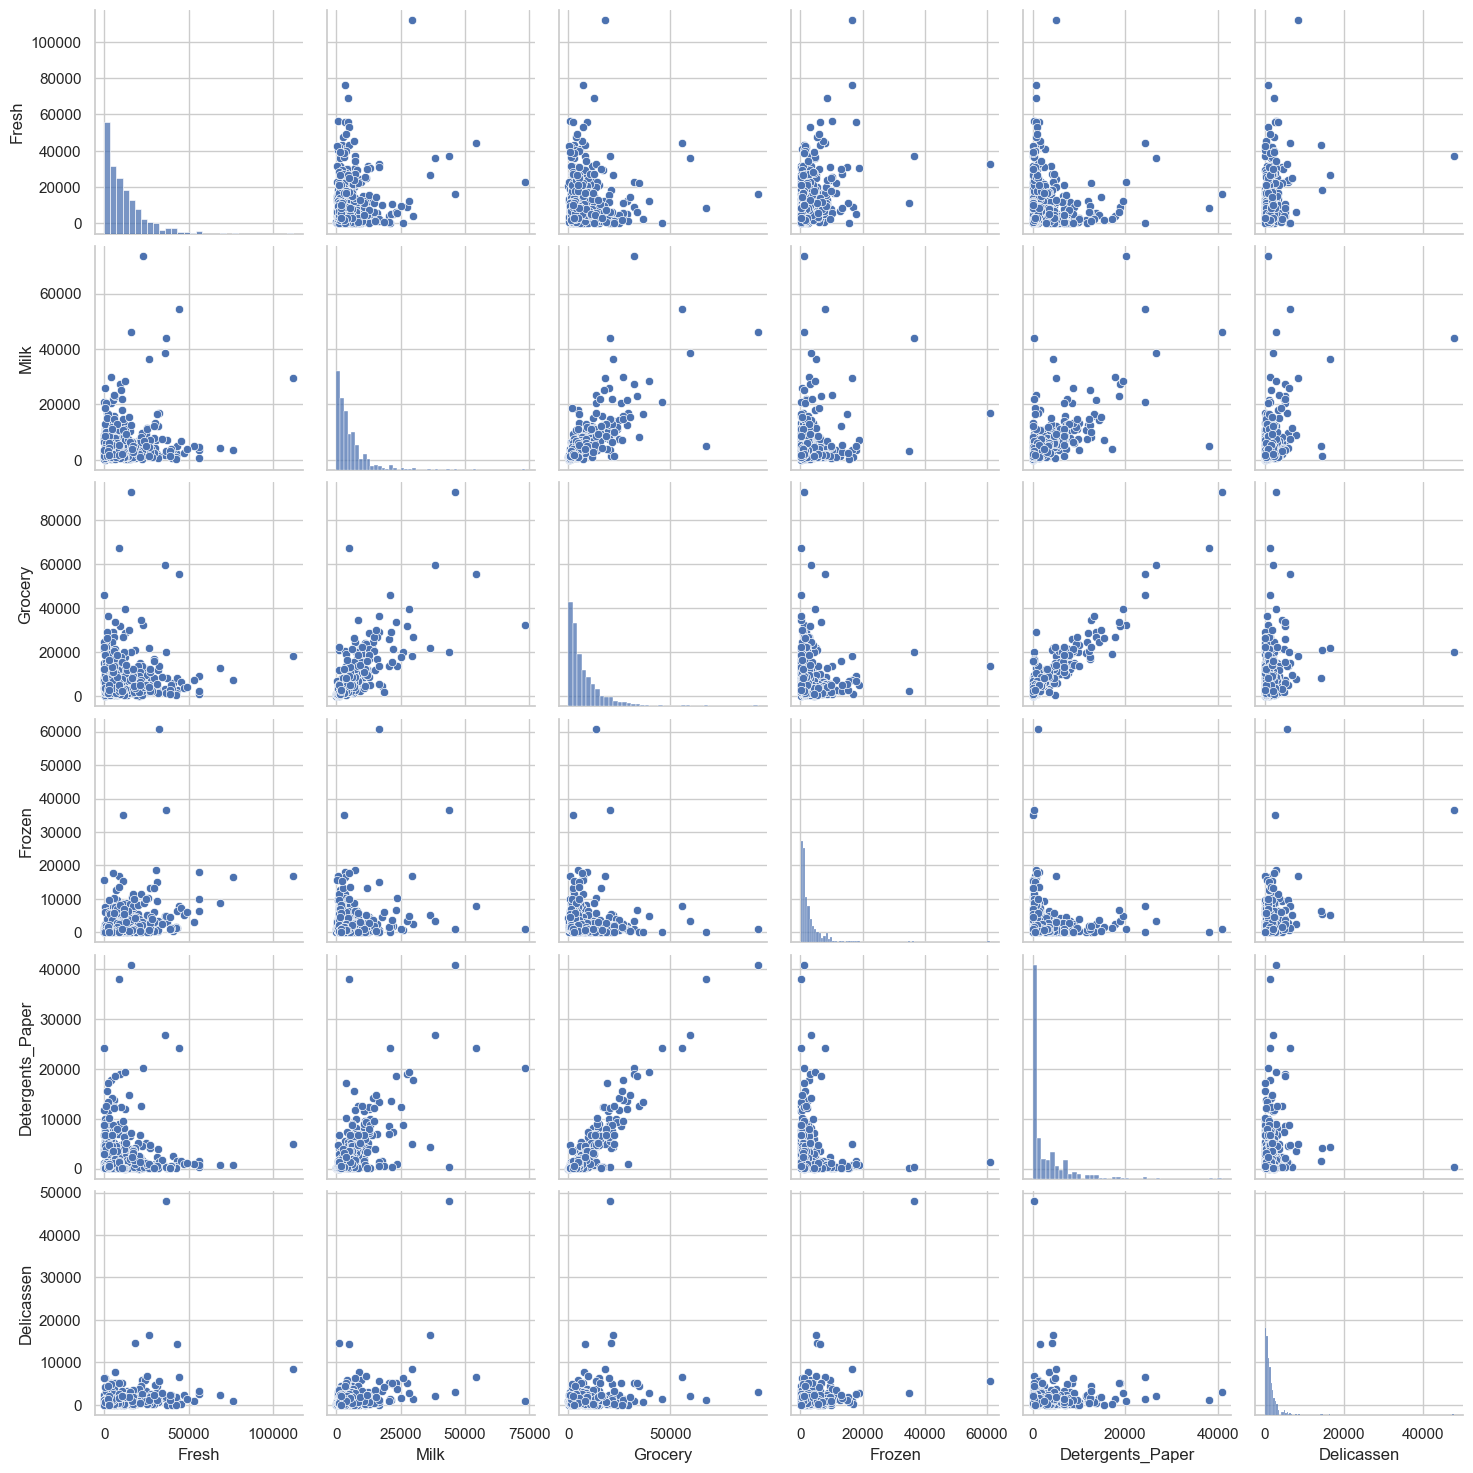

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns excluding 'Channel' and 'Region'
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = data[selected_columns]

# Scatter Plots
sns.pairplot(selected_data, kind="scatter")
plt.show()


## Exploration of a pairplot indicate, again, a very skewed distribution with the major linear corellation being between 'Grocery' and 'Detergents_Paper'

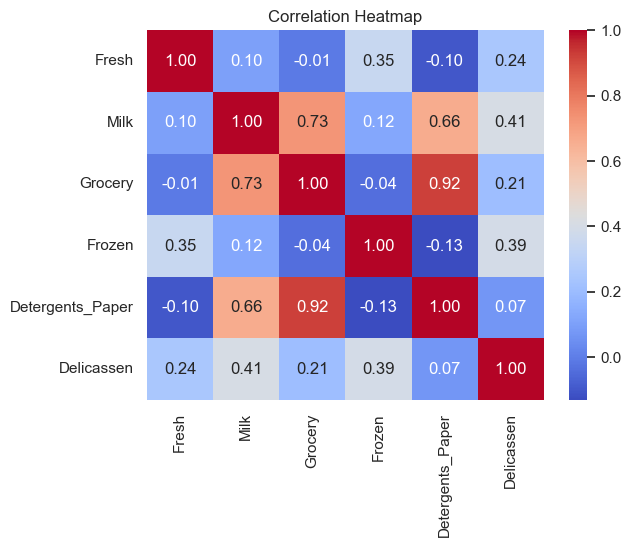

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns excluding 'Channel' and 'Region'
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = data[selected_columns]

# Heatmap
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## The corellation matrix also confirms the highest corellation between 'Grocery' and 'Detergents_Paper' at 0.92

In [55]:
### Let's check for outliers using a Z-Score

from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(selected_data)

# Threshold for considering a point as an outlier (adjust as needed)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print or analyze the outliers
print("Outliers:")
print(selected_data[outliers])


Outliers:
      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23    26373  36423    22019    5154              4337       16523
39    56159    555      902   10002               212        2916
47    44466  54259    55571    7782             24171        6465
56     4098  29892    26866    2616             17740        1340
61    35942  38369    59598    3254             26701        2017
65       85  20959    45828      36             24231        1423
71    18291   1266    21042    5373              4173       14472
85    16117  46197    92780    1026             40827        2944
86    22925  73498    32114     987             20070         903
87    43265   5025     8117    6312              1579       14351
92     9198  27472    32034    3232             18906        5130
93    11314   3090     2062   35009                71        2698
103   56082   3504     8906   18028              1480        2498
125   76237   3473     7102   16538               778         918


## Although outliers have been detected, the issue is that by excluding outliers we will lose information with only 440 records in the dataset so we have left them in at this stage. 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

Enter the number of clusters: 0


C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

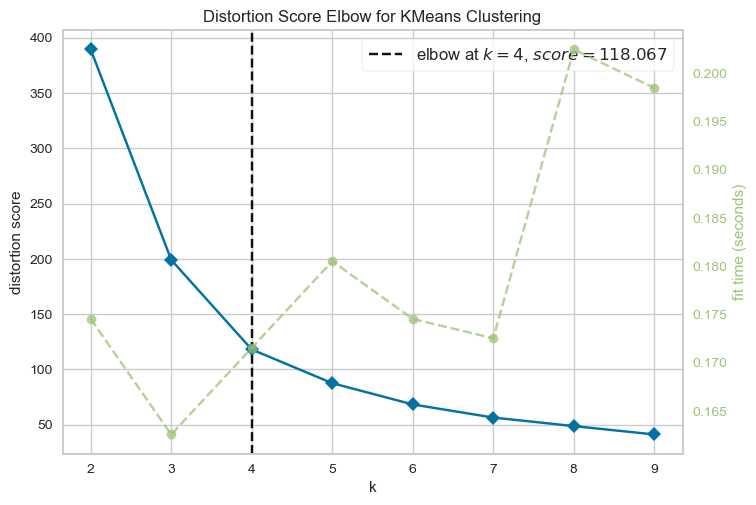

C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\envs\testEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


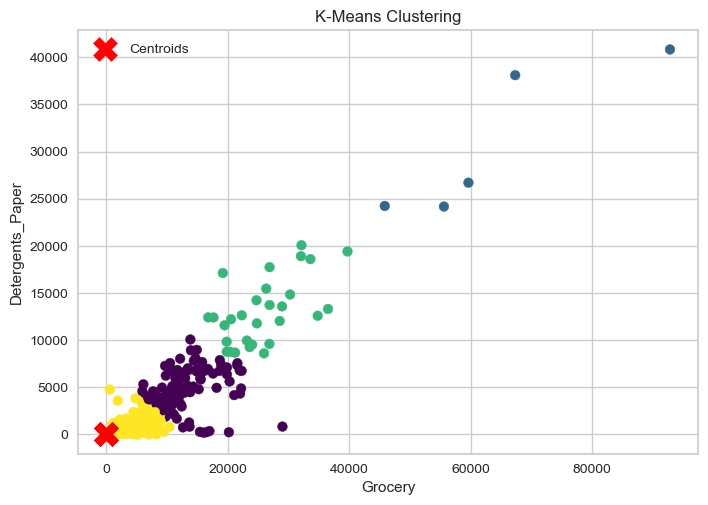

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Assuming your original DataFrame is named 'data'
# Selecting only the relevant columns
data_subset = data[['Grocery', 'Detergents_Paper']]

# Pre-processing: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Allowing the user to input the number of clusters
num_clusters = int(input("Enter the number of clusters: "))

# If the number of clusters is not specified, perform elbow analysis
if num_clusters == 0:
    # Determine the optimal number of clusters using the Elbow Method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 10))
    visualizer.fit(data_scaled)
    visualizer.show()

    # Based on the elbow plot, choose the optimal number of clusters
    num_clusters = visualizer.elbow_value_

# Perform K-Means clustering with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
plt.scatter(data['Grocery'], data['Detergents_Paper'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


## In k-means clustering with highly skewed data, clusters may be distorted toward the majority class. This algorithm relying on means is sensitive to extreme values which this dataset has potentially leading to inaccurate results.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

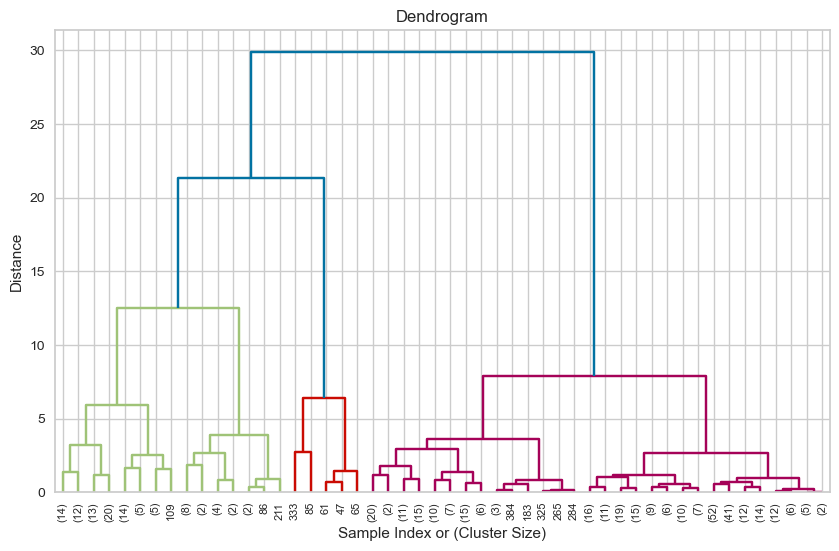

Enter the distance cutoff for clusters: 5


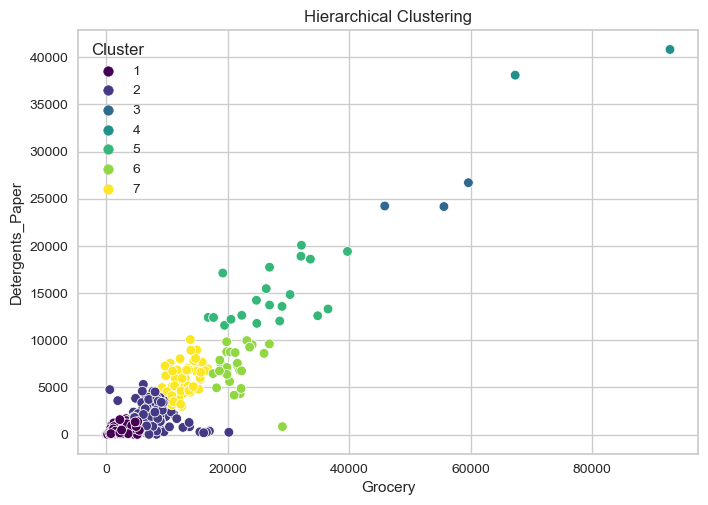

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Assuming your original DataFrame is named 'data'
# Selecting only the relevant columns
data_subset = data[['Grocery', 'Detergents_Paper']]

# Pre-processing: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Create a linkage matrix using Ward's method
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level', orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Allow user to input the distance cutoff to form clusters
distance_cutoff = float(input("Enter the distance cutoff for clusters: "))

# Perform hierarchical clustering and assign clusters
clusters = fcluster(linkage_matrix, t=distance_cutoff, criterion='distance')

# Add cluster information to the original DataFrame
data['Cluster'] = clusters

# Visualizing the clusters
sns.scatterplot(data=data, x='Grocery', y='Detergents_Paper', hue='Cluster', palette='viridis')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Hierarchical Clustering')
plt.show()


## In hierarchical clustering with heavily skewed data, the dendrogram may exhibit imbalanced structures, emphasizing dominant clusters. Once again learning how to address skewness was the major lesson learned during this project. 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

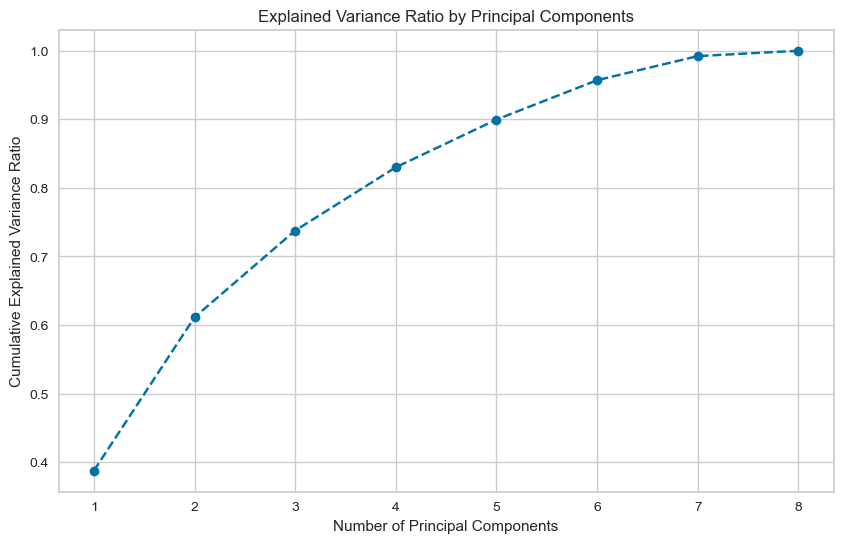

Enter the number of principal components to keep: 4
DataFrame with PCA Components:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster       PC1       PC2       PC3       PC4  
0        1338        2  0.843939 -0.515351 -0.767632 -0.044215  
1        1776        2  1.062676 -0.484601 -0.672975  0.401372  
2        7844        2  1.269141  0.682055 -0.664095  1.634953  
3        1788        1 -1.056782  0.610821 -0.505654  0.196005  
4        5185        2  0.634030  0.974199 -0.771209  0.186374  


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your original DataFrame is named 'data'
# Selecting all columns for PCA
features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Extracting features and standardizing them
data_subset = data[features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Choosing the number of components based on the plot or user input
num_components = int(input("Enter the number of principal components to keep: "))

# Retaining only the selected number of components
data_pca = pd.DataFrame(data=principal_components[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])

# Concatenating the PCA components with the original DataFrame
data_with_pca = pd.concat([data, data_pca], axis=1)

# Displaying the results
print("DataFrame with PCA Components:")
print(data_with_pca.head())


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## 1. In k-means clustering with highly skewed data, clusters may be distorted toward the majority class. The algorithm, relying on means, is sensitive to extreme values, potentially leading to inaccurate results.

## 2. In hierarchical clustering with heavily skewed data, the dendrogram may exhibit imbalanced structures, emphasizing dominant clusters.

## 3. PCA analysis with skewed data can be affected by outliers. Pre-processing, like log-transformations, would have helped mitigate skewness for more accurate feature identification.

## 4. Log Transformation should have been considered, but we ran out of time considering this entire project was only allocated 90 minutes. 